### EDA : buildings dataset

In [1]:
import pandas as pd
import os

dir_path = os.getenv('HOME')+'/data/sia/buildings/1.Training'

df1 = pd.read_csv(os.path.join(dir_path, 'building_dataset_file_list.csv'), converters={'longitude_latitude': eval})
df2 = pd.read_csv(os.path.join(dir_path, 'building_dataset_building_list.csv'), converters={'building_coordinates': eval})

In [2]:
df1.head(2)

,file_id,file_name,longitude_latitude,buildings
0,0,BLD00001_PS3_K3A_NIA0276,"[[31.4347031225, 30.0413951468, 0.0], [31.4405...",215
1,1,BLD00002_PS3_K3A_NIA0276,"[[31.4405428056, 30.0414645232, 0.0], [31.4463...",236


In [3]:
df2.head(2)

,file_id,building_id,building_coordinates,building_type_id,building_type
0,0,0,"[856, 1000, 828, 1024, 879, 1023, 878, 1015]",2,아파트
1,0,1,"[821, 969, 799, 1009, 798, 1020, 816, 1024, 84...",2,아파트


In [4]:
for i in range(len(df2)):
    cord = df2.iloc[i, 2]
    if len(cord) == 0:
            print(f'file : {df1.iloc[df2.iloc[i,0], 1]}')
            print(df2.iloc[i])
            print('----------')

file : BLD00631_PS3_K3A_NIA0277
file_id                   148
building_id               151
building_coordinates       []
building_type_id            1
building_type           소형 시설
Name: 17441, dtype: object
----------
file : BLD00708_PS3_K3A_NIA0277
file_id                   164
building_id               218
building_coordinates       []
building_type_id            1
building_type           소형 시설
Name: 20706, dtype: object
----------
file : BLD00802_PS3_K3A_NIA0277
file_id                   187
building_id                88
building_coordinates       []
building_type_id            1
building_type           소형 시설
Name: 23084, dtype: object
----------
file : BLD00818_PS3_K3A_NIA0277
file_id                 191
building_id              59
building_coordinates     []
building_type_id          2
building_type           아파트
Name: 23967, dtype: object
----------
file : BLD00818_PS3_K3A_NIA0277
file_id                 191
building_id              60
building_coordinates     []
building_type_

+ 좌표가 없는 건물들이 있다. 

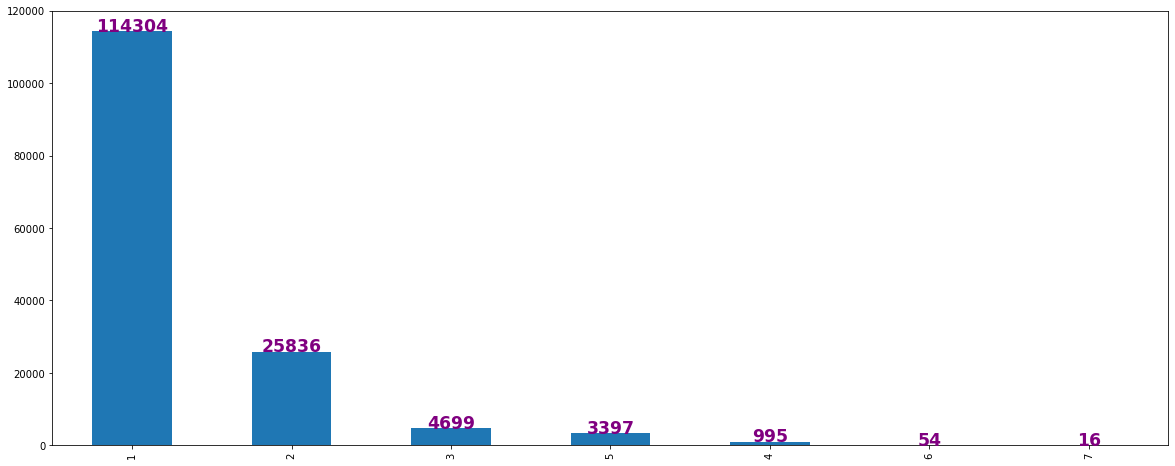

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize= (20,8))
ax = df2['building_type_id'].value_counts().plot.bar()
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    y = patch.get_height() + bl[1]
    ax.text(x, y, "%d" %(patch.get_height()), ha='center', fontsize = 'xx-large', fontweight='bold', color='purple' )

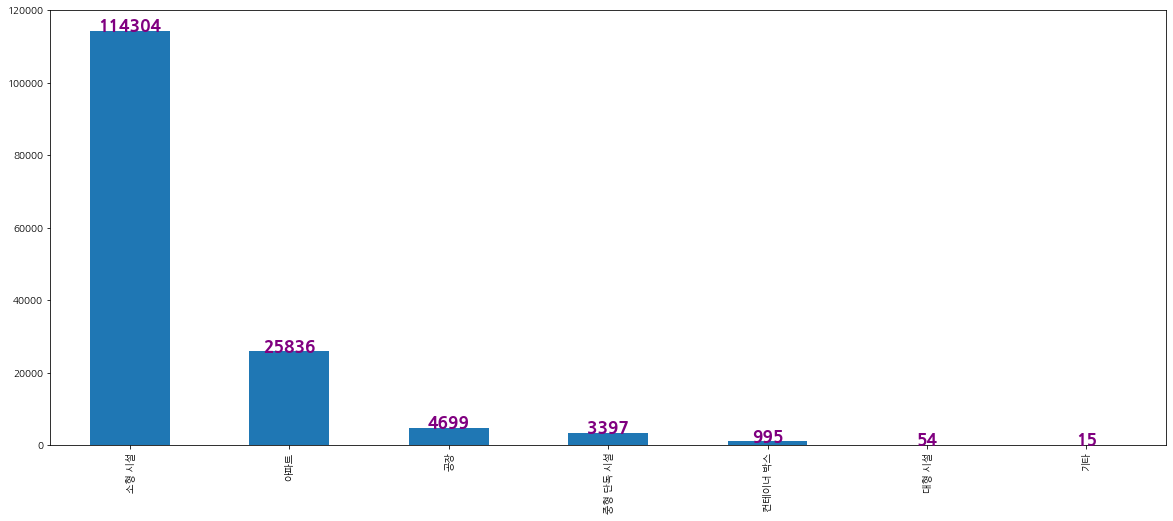

In [6]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize = (20,8))
ax = df2['building_type'].value_counts().plot.bar()
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    y = patch.get_height() + bl[1]
    ax.text(x, y, "%d" %(patch.get_height()), ha='center', fontsize = 'xx-large', fontweight='bold', color='purple')

In [7]:
condition = df2['building_type'].isna()
df2[condition]

,file_id,building_id,building_coordinates,building_type_id,building_type
22671,184,7,"[806, 142, 785, 164, 787, 174, 780, 182, 795, ...",7,NaN


+ 종류 아이디로는 기타에 해당하는 7번으로 분류되어 있으나 종류에는 기타가 입력되어 있지 않은 건물이 있다.

In [8]:
dir_path = os.getenv('HOME')+'/data/sia/'
raw_path = os.path.join(dir_path, "buildings/1.Training/raw")# 파일 경로

import cv2
import numpy as np

def mark_buildings(file_idx, idx='all'):

    f_name = df1.iloc[file_idx, 1] + '.png'
    print(f'file index : {file_idx}, file name : {f_name}')
    print('-------')
    img = cv2.imread(os.path.join(raw_path, f_name))
    
    cond = df2['file_id'] == file_idx
    temp = df2[cond]
    pts = []
    
    for i in range(len(temp)):
        poly_shape = np.array(temp.iloc[i, 2])
        pts = poly_shape.reshape(-1,2)
        
        cv2.polylines(img, [pts], True, (255,255,255), 2)
        
        if idx == 'all':
            font=cv2.FONT_HERSHEY_PLAIN
            cv2.putText(img, str(i), tuple(pts[1]), font, 1, (0,0,255), 2) # 건물 인덱스 빨간색
            cv2.putText(img, str(temp.iloc[i, 3]), tuple(pts[-2]), font, 1, (0,255,0), 1) # 건물 종류 초록색
        
        elif i == idx:  # 원하는 건물 인덱스만 표시해 봅시다.
            font=cv2.FONT_HERSHEY_PLAIN
            cv2.putText(img, str(i), tuple(pts[1]), font, 1, (0,0,255), 2) # 건물 인덱스 빨간색
            cv2.putText(img, str(temp.iloc[i, 3]), tuple(pts[-2]), font, 1, (0,255,0), 1) # 건물 종류 초록색
    
    return img

file index : 184, file name : BLD00791_PS3_K3A_NIA0277.png
-------


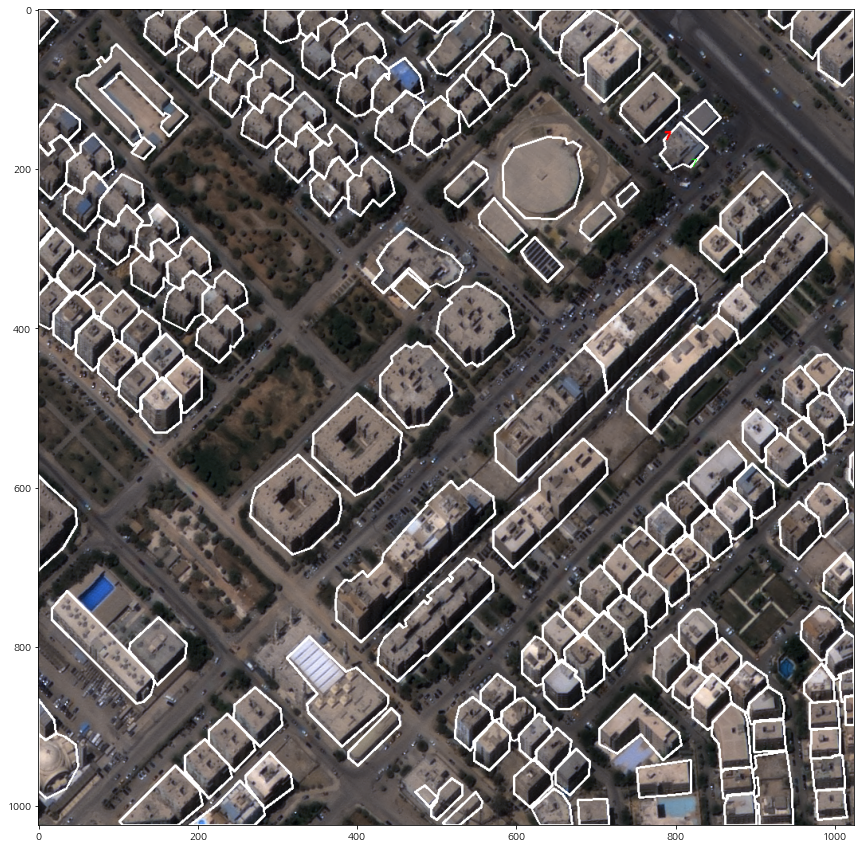

In [9]:
image = mark_buildings(184, 7)
plt.figure(figsize= (15,15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

+ 확인해 보니 별다른 문제는 없는 것 같다.


---
## json 정보를 csv로 정리하기

In [10]:
import os
import json as JSON

dir_path = os.getenv('HOME')+'/data/sia/'
train_path = os.path.join(dir_path, "buildings/1.Training/label")

file_list = os.listdir(train_path)

path_json = []

for file in file_list:
    if '.json' in file:
        path_json.append(file)

data = []
name_check = 0

for json in path_json:
    path = os.path.join(train_path, json)
    json_name, ext = os.path.splitext(json)

    with open(path) as f:
        json_data = JSON.load(f)
        png_name, ext = os.path.splitext(json_data['features'][0]['properties']['image_id'])
        if json_name != png_name:
            name_check += 1
    data.append(json_data)

print(name_check) # 이름 매칭이 잘 되어 있는지 확인 : 잘 되어 있으면 이름을 하나만 관리하면 되겠다.

0


In [11]:
# df1 리스트
file_idx = []
name_list = []
lat_lon = []
build_no = []

# df2 리스트
building_idx = []
bd_cor = []
bd_type_id = []
bd_type = []

def make_df1(data):
   
    name_list.append(data['features'][0]['properties']['image_id'][:-4])
    lat_lon.append(data['features'][0]['geometry']['coordinates'])
    build_no.append(len(data['features']))

def make_df2(data):

    bd_cor.append(data['properties']['building_imcoords'].split(','))
    bd_type_id.append(data['properties']['type_id'])
    bd_type.append(data['properties']['type_name'])


import pandas as pd

def make_whole_df(data):

    
    for i in range(len(data)):
        name_list, make_df1(data[i])
        file_idx.append(i)

        for j in range(len(data[i]['features'])):
            make_df2(data[i]['features'][j])
            building_idx.append([i,j])

    df1 = pd.DataFrame({
        'file_id' : file_idx,
        'file_name' : name_list,
        'longitude_latitude' : lat_lon,
        'buildings' : build_no
    })

    df2 = pd.DataFrame({
        'building_id' : building_idx,
        'building_coordinates' : bd_cor,
        'building_type_id' : bd_type_id,
        'building_type' : bd_type
    })

    return df1, df2

In [12]:
df1, df2 = make_whole_df(data)

df2['file_id'] = df2['building_id'].map(lambda x : x[0])
df2['building_id'] = df2['building_id'].map(lambda x : x[1])
df2 = df2[['file_id', 'building_id', 'building_coordinates', 'building_type_id', 'building_type']]

In [13]:
import re

def check_text(string):
    string = ','.join(string)
    string = re.sub(r"[0-9.,]+", " ", string)
    if string != ' ':
        return True
    else:
        return False

df2['_check'] = df2['building_coordinates'].map(check_text)

In [14]:
condition = df2['_check']
df2[condition]['building_coordinates']

761       [1.3468013468013469, 500.3367003367003, 50.168...
1286      [662.7288739605947, 67.32150903207307, 689.154...
1761      [0, 927.2046872921402, 16.43559889642727, 941....
1984      [906.7066727927294, -1.4210854715202004e-14, 8...
3756      [0.7119120121247514, 104.65106578233843, 12.45...
                                ...                        
144096    [1000.1671515472098, 0, 997.7297011372652, 26....
147659    [406.4307887136879, 0, 377.96481907615333, 15....
148704    [0.3122674766104341, 616.1037313523865, 22.170...
149054    [434.40586910057186, 0, 434.8988119307569, 8.8...
149081    [0, 669.7778900963132, 10.782579395164689, 670...
Name: building_coordinates, Length: 326, dtype: object

In [15]:
df2.iloc[761]['building_coordinates']

['1.3468013468013469',
 '500.3367003367003',
 '50.168350168350166',
 '466.3299663299663',
 '93.96981306520914',
 '370.71744263264605',
 '70.33113854838972',
 '385.8389107446447',
 '48.78231699956811',
 '399.6533733019031',
 '-5.684341886080804e-14',
 '335.4287099446815']

In [16]:
def make_int_cord(cor):
    
    temp = []
    for i in cor:
        try:
            temp.append(int(float(i)))
        except:
            pass
    return temp

In [17]:
df2['building_coordinates'] = df2['building_coordinates'].map(make_int_cord)
df2

,file_id,building_id,building_coordinates,building_type_id,building_type,_check
0,0,0,"[1015, 992, 1003, 989, 999, 1005, 1020, 1009]",1,소형 시설,False
1,0,1,"[995, 985, 968, 980, 962, 988, 964, 1003, 994,...",1,소형 시설,False
2,0,2,"[1024, 969, 1016, 971, 1014, 981, 1011, 985, 1...",1,소형 시설,False
3,0,3,"[1017, 971, 996, 966, 992, 981, 1002, 990, 101...",1,소형 시설,False
4,0,4,"[998, 965, 974, 958, 970, 972, 971, 981, 992, ...",1,소형 시설,False
...,...,...,...,...,...,...
149296,1237,247,"[813, 201, 813, 214, 821, 216, 850, 218, 856, ...",1,소형 시설,False
149297,1237,248,"[858, 215, 858, 233, 863, 234, 871, 233, 872, ...",1,소형 시설,False
149298,1237,249,"[869, 197, 873, 196, 874, 194, 899, 195, 898, ...",1,소형 시설,False
149299,1237,250,"[205, 210, 214, 210, 218, 211, 216, 242, 211, ...",1,소형 시설,False


In [18]:
df2.drop(['_check'], axis=1, inplace=True)

df1.to_csv('building_dataset_file_list.csv', index=False)
df2.to_csv('building_dataset_building_list.csv', index=False)